# Programming Tools for the Data Scientist Final Project
## Brad Yin, Geoffrey Budiman, Sean Wiryadi

## 1. Introduction

As students studying data science and are aiming to break into the industry, understanding the job market is crucial. Online job boards like Glassdoor are home to a vast amount of data on data science roles which we can use for analysis. Hence, for our final data science project, we aims to explore and analyze trends in the Data Science job market. Hence, we aim to do the following
- Identify the key factors that affect data science salaries.
- Analyze geographic salary disparities, pinpointing states and cities with the highest-paying data science jobs.
- Predict the average salary for a data science job based on the factors that we have identified.

## 2. Data Collection and Preprocessing

For our project, we will utilize a dataset containing information on over 700 data science job listings from Glassdoor.com from 2017-2018 sourced from Kaggle. To retrieve this dataset for use on our investigation, we first download the 'eda_data.csv' file from the following link:
https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor  
Next, we use the following code to load in the dataset

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('eda_data.csv')

This dataset includes over 30 columns, however we have chosen to only use the following columns in our analysis.
- Rating: Typically, this column includes the employer or job rating provided on a scale.
- Company Name: The name of the company posting the job.
- Location: The location where the job is based.
- Headquarters: The main office or headquarters of the company.
- Size: The size of the company in terms of number of employees.
- Founded: The year the company was founded.
- Type of ownership: Describes whether the company is privately owned, publicly traded, etc.
- Industry: The industry in which the company operates.
- Sector: The sector of the economy to which the company belongs.
- Revenue: The annual revenue of the company.
- avg_salary: The average salary for the job, divided by 1000.
- job_state: The state in which the job is located.
- python_yn: Indicates whether the job requires Python skills (1/0).
- R_yn: Indicates whether the job requires R skills (1/0).
- spark: Indicates whether the job requires Apache Spark skills (1/0).
- aws: Indicates whether the job requires AWS (Amazon Web Services) skills (1/0).
- excel: Indicates whether the job requires Excel skills (1/0).
- job_simp: A simplified or categorized version of the job title.
- seniority: Indicates whether the job is a senior position (1/0).
- num_comp: The number of competitors or similar companies mentioned.  

Additionally, we choose to add a column called 'ML_yn' that indicates whether the job description mentions 'Machine Learning' (Yes/No). We do so with the following code

In [3]:
df['ML_yn'] = df['Job Description'].apply(lambda x: 1 if re.search(r"machine\s*-\s*learning", x, flags=re.IGNORECASE) else 0)

We chose not to keep the following columns for these reasons
- Job Title: Redundant with job_simp
- Salary Estimate: Redundant with avg_salary
- min_salary: Same as above
- max_salary: Same as above
- Job Description: Too long for our analysis
- desc_len: Not useful information
- Competitors: Redundant with num_comp
- hourly: Not useful information
- employer_provided: Not useful information
- company_txt: Redundant with Company Name
- same_state: Is information on the user that scrapped the data, not the job listing
- age: Is information on the user that scrapped the data, not the job listing

We drop the columns using the following code

In [4]:
columns_to_drop = [
    'Job Title', 'Salary Estimate', 'Job Description', 'Competitors',
    'hourly', 'employer_provided', 'min_salary', 'max_salary',
    'company_txt', 'same_state', 'age', 'desc_len', 'Unnamed: 0'
]
df = df.drop(columns=columns_to_drop)

Since we are still students who are trying to break into the industry, we will focus on entry-level jobs. Hence, we will filter out the senior level jobs and then remove the 'seniority' column. Additionally, we will filter out rows where 'job_simp' is 'director' or 'manager'.

In [5]:
df = df[df['seniority'] != 'senior']
df = df.drop(columns=['seniority'])
df = df[(df['job_simp'] != 'director') & (df['job_simp'] != 'manager')]

Next, we will remove all rows with empty values. To do this, we must first replace some values with pd.NA as the dataset uses different values to represent missing values

In [6]:
df = df.replace(-1.0, pd.NA)
df = df.replace(-1, pd.NA)
df = df.replace('-1', pd.NA)
df['job_simp'] = df['job_simp'].replace('na', pd.NA)
df = df.dropna()

C:\Users\geoff\anaconda3\lib\site-packages\pandas\core\missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


Then, we modify the values in the 'Company Name' such that it only contains the Company Name

In [7]:
df['Company Name'] = df['Company Name'].str.replace(r'\n[\d\.]+', '', regex=True)

Next, we multiply the values in 'avg_salary' by 1000 as the values in the dataset have been divided by 1000

In [8]:
df['avg_salary'] = (df['avg_salary'] * 1000).astype(int)

Now, we will use the following map to convert the 'job_state' names to the full state name

In [9]:
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

df['job_state'] = df['job_state'].map(state_map)

Then, we extract the city name from 'Location' and rename the column to 'Job_City' as the state data is redundant with the 'job_state' column

In [10]:
df['Location'] = df['Location'].str.split(',').str[0]
df = df.rename(columns={'Location': 'Job_City'})

Next, we will rename columns such that there are no spaces as they may cause problems later on

In [11]:
df = df.rename(columns={'Company Name': 'Company_Name', 'Type of ownership': 'Type_of_Ownership',
                        'avg_salary': 'Average_Salary', 'job_state': 'Job_State', 'python_yn': 'Python_yn', 
                        'spark': 'Spark_yn', 'aws': 'AWS_yn', 'excel': 'Excel_yn', 'job_simp': 'Job_Title',
                        'num_comp': 'Number_of_Competitors'})

Finally, we will reset the index of the dataframe

In [12]:
df.reset_index(drop=True, inplace=True)

## 3. Analysis

The first part of our analysis is to identify the key factors that most significantly affect data science salaries. To do so, we will first load in the following libraries

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

We will first analyze the two numerical columns: 'Rating' and 'Founded'. Before using our statistical techniques, we run the following code to process the columns

In [14]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')
df['Number_of_Competitors'] = pd.to_numeric(df['Number_of_Competitors'], errors='coerce')
numerical_columns = ['Rating', 'Founded', 'Number_of_Competitors']

Before conducting any statistical tests, we constructed the following scatterplots to visualize the relationship between the two variables and the Average Salary

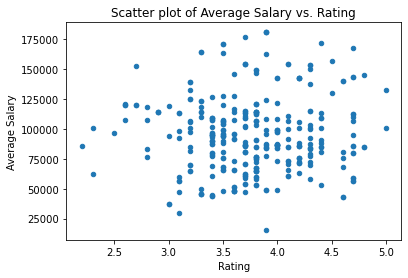

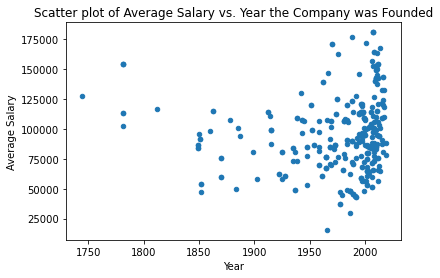

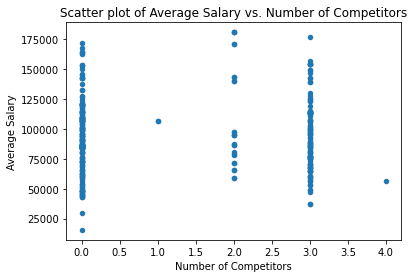

In [15]:
df.plot(kind='scatter', x='Rating', y='Average_Salary')
plt.title('Scatter plot of Average Salary vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()

df.plot(kind='scatter', x='Founded', y='Average_Salary')
plt.title('Scatter plot of Average Salary vs. Year the Company was Founded')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()

df.plot(kind='scatter', x='Number_of_Competitors', y='Average_Salary')
plt.title('Scatter plot of Average Salary vs. Number of Competitors')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Salary')
plt.show()

From the scatterplots, there is no clear correlation between the two variables and the Average Salary. However, to understand the relationships better, we calculate the Pearson Correlation Coefficient between Average Salary and the two quantitative variables

In [16]:
for num in numerical_columns:
    correlation, p_value = pearsonr(df['Average_Salary'], df[num])
    print(f'Pearson Correlation Coefficient between Average_Salary and {num}: {correlation:.4f}, p-value: {p_value:.4f}')

Pearson Correlation Coefficient between Average_Salary and Rating: 0.0364, p-value: 0.5089
Pearson Correlation Coefficient between Average_Salary and Founded: 0.0546, p-value: 0.3211
Pearson Correlation Coefficient between Average_Salary and Number_of_Competitors: 0.0341, p-value: 0.5360


For all three variables, the p-value is much higher than the significant level of $\alpha = 0.01$. This indicates that there is not enough evidence to reject the null hypothesis that the variables do not have an impact on Average Salary. Thus, neither 'Rating' or 'Founded' has a statistically significant impact on Average Salary.

Next, the following columns only have two outcomes, 1 or 0. Hence, to understand how these columns impact the average salary, we will perform t-tests

In [17]:
binary_columns = ['Python_yn', 'R_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn', 'ML_yn']

In [18]:
for col in binary_columns:
    group1 = df[df[col] == 1]['Average_Salary']
    group2 = df[df[col] == 0]['Average_Salary']
    
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"T-Test for {col}: t-statistic={t_stat:.4f}, p-value={p_value}")

T-Test for Python_yn: t-statistic=4.1909, p-value=3.572082994753845e-05
T-Test for R_yn: t-statistic=-1.1143, p-value=0.2659819199219275
T-Test for Spark_yn: t-statistic=5.3158, p-value=1.9605836726180836e-07
T-Test for AWS_yn: t-statistic=3.0098, p-value=0.002815733750007966
T-Test for Excel_yn: t-statistic=-4.2585, p-value=2.687189020407582e-05
T-Test for ML_yn: t-statistic=-0.2006, p-value=0.8411584878140405


For the columns 'Python_yn', 'Spark_yn', 'AWS_yn', and 'Excel_yn', the p-value is lower than the significant level of $\alpha = 0.01$. Hence, we reject the null hypothesis that the variables do not have an impact on Average Salary in favor of the alternative hypothesis that the variables have an impact on Average Salary. Thus, the columns 'Python_yn', 'Spark_yn', 'AWS_yn', and 'Excel_yn' have a statistically significant impact on Average Salary. However, for the columns 'R_yn' and 'ML_yn', the p-value is higher than the significant level of $\alpha = 0.01$. Hence, we fail to reject the null hypothesis that the variables do not have an impact on Average Salary in favor of the alternative hypothesis that the variables have an impact on Average Salary. Thus, the columns 'R_yn' and 'ML_yn' do not have a statistically significant impact on Average Salary.

Next, the following columns have more than two outcomes. Hence, to understand how these columns impact the average salary, we will perform ANOVA tests

In [19]:
categorical_columns = ['Company_Name', 'Job_City', 'Headquarters', 'Size', 'Type_of_Ownership',
                       'Industry', 'Sector', 'Job_State', 'Job_Title']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [20]:
for cat in categorical_columns:
    model = ols('Average_Salary ~ C({})'.format(cat), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    p_value = anova_table['PR(>F)'][0]
    print(f'ANOVA for {cat}: P-value = {p_value}')

ANOVA for Company_Name: P-value = 2.0697888650049463e-62
ANOVA for Job_City: P-value = 2.0802075280591389e-16
ANOVA for Headquarters: P-value = 7.67601070223217e-20
ANOVA for Size: P-value = 0.0009670480538782166
ANOVA for Type_of_Ownership: P-value = 0.42272766060224154
ANOVA for Industry: P-value = 3.3638068562385527e-07
ANOVA for Sector: P-value = 9.278269408108286e-06
ANOVA for Job_State: P-value = 9.88193845089151e-09
ANOVA for Job_Title: P-value = 6.0647774682673345e-30


For the columns 'Company_Name', 'Job_City', 'Headquarters', 'Size', 'Industry', 'Sector', 'Job_State', and 'Job_Title', the p-value is lower than the significant level of $\alpha = 0.01$. Hence, we reject the null hypothesis that the variables do not have an impact on Average Salary in favor of the alternative hypothesis that the variables have an impact on Average Salary. Thus, the columns 'Company_Name', 'Job_City', 'Headquarters', 'Size', 'Industry', 'Sector', 'Job_State', and 'Job_Title' have a statistically significant impact on Average Salary. However, for the column 'Type_of_Ownership', the p-value is higher than the significant level of $\alpha = 0.01$. Hence, we fail to reject the null hypothesis that the variables do not have an impact on Average Salary in favor of the alternative hypothesis that the variables have an impact on Average Salary. Thus, the column 'Type_of_Ownership' does not have a statistically significant impact on Average Salary.  

As we have identified that 'Job_City' and 'Job_State' both have a statistically significant impact on the Average Salary, we decided to conduct an analysis on geographic salary disparities for the next part of this study. Our first step is to make a copy of our dataframe

In [21]:
location_df = df.copy()

Next, we group the rows by 'Job_City' and 'Job_State' to find out which states have the highest average salaries for data science jobs

In [22]:
df_city = location_df[['Job_City', 'Average_Salary']].groupby('Job_City').mean().reset_index()
df_state = location_df[['Job_State', 'Average_Salary']].groupby('Job_State').mean().reset_index()

df_city = df_city.sort_values(by='Average_Salary', ascending=False)
df_state = df_state.sort_values(by='Average_Salary', ascending=False)

We can visualize our findings using the following code

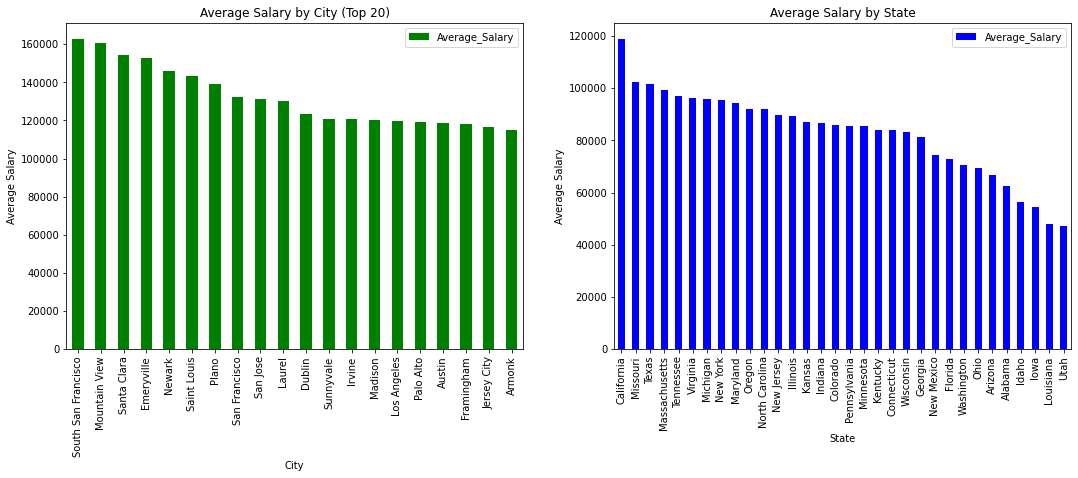

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

df_city[0:20].plot.bar(x='Job_City', y='Average_Salary', ax=ax1, color='green')
ax1.set_title('Average Salary by City (Top 20)')
ax1.set_xlabel('City')
ax1.set_ylabel('Average Salary')
ax1.tick_params(axis='x', rotation=90)

df_state.plot.bar(x='Job_State', y='Average_Salary', ax=ax2, color='blue')
ax2.set_title('Average Salary by State')
ax2.set_xlabel('State')
ax2.set_ylabel('Average Salary')
ax2.tick_params(axis='x', rotation=90)

plt.show()

Next, we will attempt to construct a linear regression model to predict average salary using 'Job_State'. We have decided not to make one using 'Job_City' due to a majority of the cities having very little rows in the dataframe. To do this, we will first load in the following libraries

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Before constructing our model, we first split the dataframe into Train and Test Sets and create dummy variables for the 'Job_State' column

In [25]:
X_state = pd.get_dummies(location_df['Job_State'])
y_state = location_df['Average_Salary']
X_train, X_test, y_train, y_test = train_test_split(X_state, y_state, test_size=0.2, random_state=42)

Now, we construct the linear regression model and calculate the RMSE and R-Squared values

In [26]:
model_state = LinearRegression()
model_state.fit(X_train, y_train)
y_pred_linear = model_state.predict(X_test)

rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"R-Squared: {r2_linear}\n")

Linear Regression Results:
Root Mean Squared Error (RMSE): 25407.108261143054
R-Squared: 0.342901011548123



We can visualize the accuracy of the model using the following code

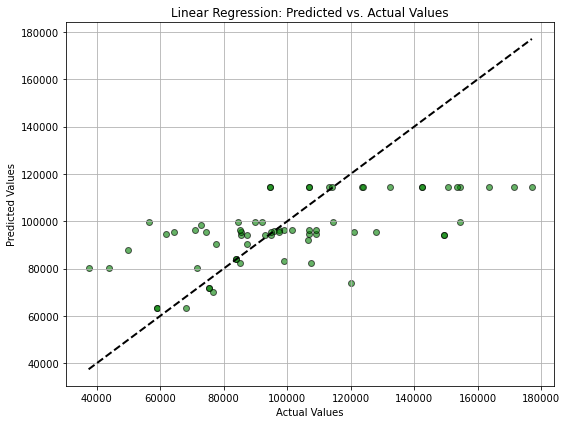

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. Actual Values')
plt.grid(True)
plt.tight_layout()

plt.show()

We can see from the high RMSE, low R-Squared value, and the above plot, that the linear regression model lacks accuracy in predicting average salaries for data science jobs based on 'Job_State'.

Hence, we will attempt building a Random Forest Regression model to see if it performs better. To do so, we first load in the following library

In [28]:
from sklearn.ensemble import RandomForestRegressor

Now, we construct the Random Forest Regression model and calculate the RMSE and R-Squared values

In [29]:
model_state = RandomForestRegressor(n_estimators=100, random_state=42)
model_state.fit(X_train, y_train)
y_pred_rf = model_state.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-Squared: {r2_rf}")

Random Forest Regression Results:
Root Mean Squared Error (RMSE): 25373.944426698075
R-Squared: 0.3446153112923237


We can visualize the accuracy of the model using the following code

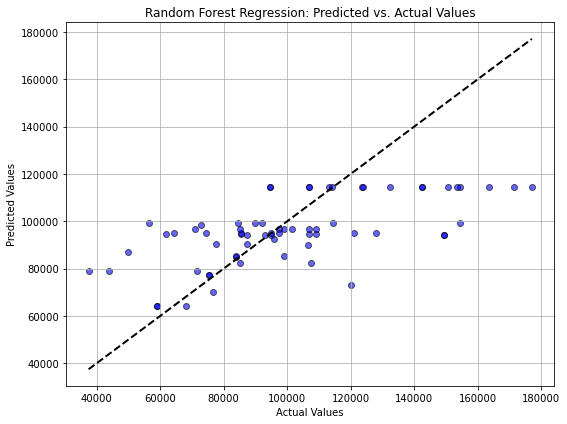

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs. Actual Values')
plt.grid(True)
plt.tight_layout()

plt.show()

Again, the model has a high RMSE and a low R-Squared value, only slightly better than the Linear Regression Model. This suggests that we cannot predict average job salary based on 'Job_State' alone. Hence, for the final part of our study, we will attempt to construct a model using all of the columns that have a statistically significant impact on the average salary

First, we use the following code to prepare our data

In [31]:
columns_wanted = ['Average_Salary','Company_Name', 'Job_City', 'Headquarters', 'Size', 'Industry', 'Sector', 'Job_State', 'Job_Title']
binary_columns = ['Python_yn', 'Spark_yn', 'AWS_yn', 'Excel_yn']
binary_df = df[binary_columns]
categorical_df = df[columns_wanted]
categorical_vars = ['Company_Name', 'Job_City', 'Headquarters', 'Size', 'Industry', 'Sector', 'Job_State', 'Job_Title']
df_encoded = pd.get_dummies(categorical_df, columns=categorical_vars)
df_encoded[binary_columns] = binary_df

Then, we split the dataframe into 'Train' and 'Test' data

In [32]:
target_column = 'Average_Salary'
feature_columns = df_encoded.columns[df_encoded.columns != target_column]

X = df_encoded[feature_columns]
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we construct the linear regression model and calculate the RMSE and R-Squared values

In [33]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_linear}")
print(f"R-Squared: {r2_linear}\n")

Linear Regression Results:
Root Mean Squared Error (RMSE): 4377725353860543.5
R-Squared: -1.9508206572734547e+22



We can visualize the accuracy of the model using the following code

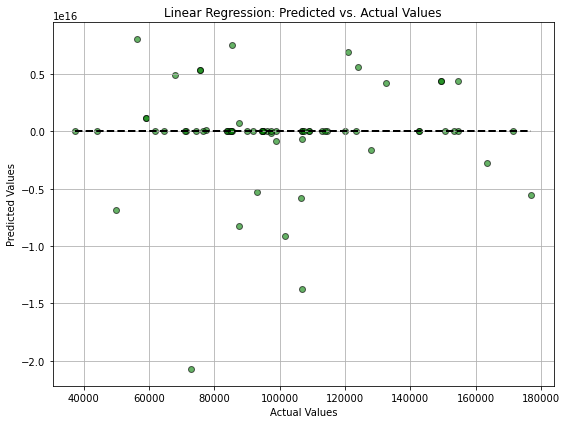

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='green', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. Actual Values')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see from the extremely high RMSE, extremely low R-Squared value, and the above plot, that the linear regression model is not able to predict average salaries for data science jobs based on 'Job_State'. This is highly likely due to the non-linear nature of the data. Hence, we will now try to construct a Random Forest Regression model to see if it performs better. 

In [35]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-Squared: {r2_rf}")

Random Forest Regression Results:
Root Mean Squared Error (RMSE): 17952.714951547558
R-Squared: 0.6719193679147115


We can visualize the accuracy of the model using the following code

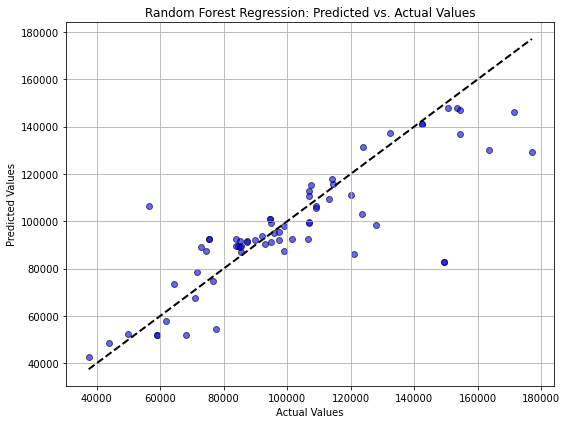

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Predicted vs. Actual Values')
plt.grid(True)
plt.tight_layout()

plt.show()

The Random Forest Regression Model has by far the lowest RMSE and highest R-Squared values among all of the models that we have constructed. Hence, this tell us that it is the most accurate model in predicting the average salary of a data science job.

Using this Random Forest Regression Model, we can now identify the factors that most impact the average salary of data science jobs. We do this by using the following code

In [37]:
importance_values = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Now, we can see which features most significantly affect salary predictions

In [38]:
importance_df.head(10)

,Feature,Importance
558,Job_Title_analyst,0.345212
528,Job_State_California,0.091277
424,"Headquarters_San Francisco, CA",0.036733
171,Company_Name_Tapjoy,0.017164
472,Industry_Enterprise Software & Network Solutions,0.016666
186,Company_Name_Two Sigma,0.016266
559,Job_Title_data engineer,0.014947
303,Job_City_San Francisco,0.013994
562,Python_yn,0.012055
514,Sector_Information Technology,0.011879


## 4. Recommendations

From our analysis on how different factors affect the average salary of entry-level data science jobs, we can make the following recommendations for data science students looking for their first data science job in order to maximize their potential salary.
- Specialize in High-Impact Roles: The feature 'Job_Title_analyst' has the most significant importance in determining average salary based on our calculations. This indicates that these roles are valued differently. Hence, students should consider specializing in analyst skills which are evidently high impact and could lead to higher salaries
- Target Job Markets in High-Paying Locations: The feature 'Job_State_California' has the second most significant importance in determining average salary based on our calculations along with 'Job_City_San Francisco' being in the top 10 most important features. This suggests that location plays a very important role in determining average salary. Therefore, students should consider moving to cities and states that have higher average salaries for data science jobs
- Develop Important Skills: The feature 'Python_yn' has the most significant importance in determining average salary among the different skills that we analyzed in our study. Hence, students should focus on developing their skills in this language in order to potentially obtain higher salaries. Additionally, 'Industry_Enterprise Software & Network Solutions' has the highest importance among all the industries and 'Sector_Information Technology' has the highest importance among all the sectors. Thus, it is recommended to develop skills specific to this industry and sector.

## 5. Conclusion

For this project, we have utilized a dataset from Kaggle to analyze how several factors affect the average salary of entry level data science jobs in order to gain a better understanding on the job market. First, we used multiple data-preprocessing techniques to prepare our data for use in our study. Additionally, we have used feature engineering in order to create a new column, 'ML_yn', from the original column 'Job Description' to see how knowing machine learning skills impacts the average salary. After preprocessing the data, we start our analysis. We first use 3 statistical techniques - Pearson Correlation Coefficient, t-testing, and ANOVA testing - in order to conduct hypothesis tests to see which factors have an impact on the average salary. After identifying 'Job_City' and 'Job_State' as two of the factors that have a statistically significant impact on the average salary, we do a deeper analysis on how geographical location affects the average salary. As part of this deeper investigation, we constructed two models using Linear Regression and Random Forest Regression to predict average salary using 'Job_State'. However, due to the low accuracy of the two models, we decided to include all of the variables that we identified in the first part of our study to have a statistically significant impact on average salary into our model. Our first model that we make using all of these variables was a Linear Regression Model which resulted in an extremely inaccurate model. We believed that this was most likely due to the non-linear nature of our data, thus we constructed another model using Random Forest Regression. This new model was by far the most accurate out of all the models that we made. Finally, using this model, we calculated which factors had the most impact the average salary of data science jobs in order to come up with our recommendations.